In [1]:
import numpy as np

from nanopyx.core.transform.image_polar import *
from nanopyx.core.transform.image_cart import *
from skimage.draw import disk

from matplotlib import pyplot as plt



image = np.zeros((256, 512), dtype=np.float32) 
rr, cc = disk((128-10,256-10), 50, shape=image.shape)
image[rr,cc] = 1

image_GT = image.copy()

In [2]:
%%prun -s cumulative -q -l 100 -T prun_polar.profile
# Profile the run

imageNNpolar = nearest_neighbor_polar(image)
imageBLpolar = bilinear_polar(image)
imageBCpolar = bicubic_polar(image)
imageCRpolar = catmull_rom_polar(image)
imageLpolar = lanczos_polar(image)
imageSkipolar = skimage_polar(image)



polar_images = {
    "nearest-neighbor-polar": imageNNpolar,
    "bilinear-polar": imageBLpolar,
    "bilinear-polar": imageBLpolar,
    "bicubic-polar": imageBCpolar,
    "catmull-rom-polar": imageCRpolar,
    "lanczos-polar": imageLpolar,
    "skimage-polar": imageSkipolar
}

nearest_neighbor_polar took 1.729012 mseconds
bilinear_polar took 0.995159 mseconds
bicubic_polar took 0.878096 mseconds
catmull_rom_polar took 0.959873 mseconds
lanczos_polar took 8.424044 mseconds
skimage_polar took 6.028652 mseconds
 
*** Profile printout saved to text file 'prun_polar.profile'.


In [3]:
%%prun -s cumulative -q -l 100 -T prun_cartesian.profile
# Profile the run

imageNNcart = nearest_neighbor_cart(imageNNpolar,image.shape[1], image.shape[0])
imageBLcart = bilinear_cart(imageBLpolar,image.shape[1], image.shape[0])
imageBCcart = bicubic_cart(imageBCpolar,image.shape[1], image.shape[0])
imageCRcart = catmull_rom_cart(imageCRpolar,image.shape[1], image.shape[0])
imageLcart= lanczos_cart(imageLpolar,image.shape[1], image.shape[0])



cart_images = {
    "nearest-neighbor-cart": imageNNcart,
    "bilinear-cart": imageBLcart,
    "bilinear-cart": imageBLcart,
    "bicubic-cart": imageBCcart,
    "catmull-rom-cart": imageCRcart,
    "lanczos-cart": imageLcart,
    "skimage-cart": np.zeros(image.shape)
}

nearest_neighbor_cart took 0.954151 mseconds
bilinear_cart took 1.189947 mseconds
bicubic_cart took 1.750708 mseconds
catmull_rom_cart took 1.634121 mseconds
lanczos_cart took 17.482042 mseconds
 
*** Profile printout saved to text file 'prun_cartesian.profile'.


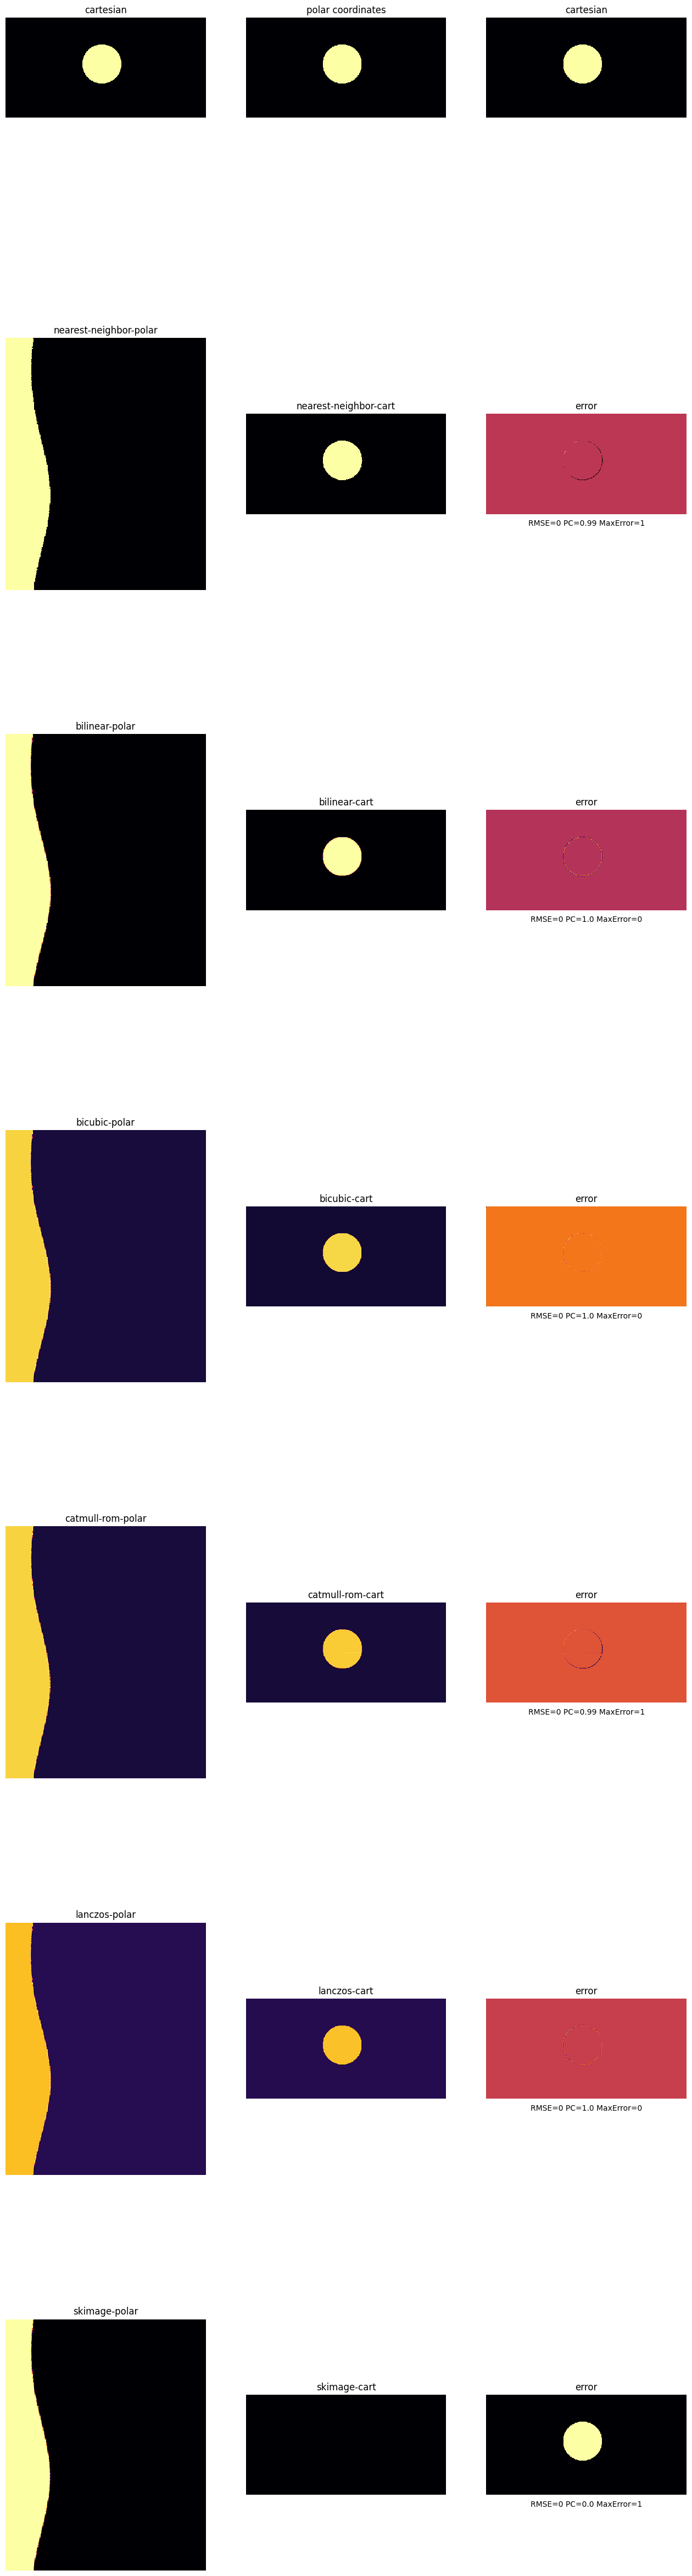

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from nanopyx.core.analysis.pearson_correlation import pearson_correlation
import numpy as np

plt.close('all')
# Create a figure with 3 subplots arranged in a row
fig, axs = plt.subplots(len(polar_images)+1, 3, figsize=(16, 4*16))
sns.heatmap(image, ax=axs[0,0], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
sns.heatmap(image_GT, ax=axs[0,1], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
sns.heatmap(image, ax=axs[0,2], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
axs[0,0].set_title("cartesian")
axs[0,1].set_title(f"polar coordinates")
axs[0,2].set_title(f"cartesian")

for i in range(len(polar_images)):
    idp = list(polar_images.keys())[i]
    idc = list(cart_images.keys())[i]

    polar_image = list(polar_images.values())[i]
    cart_image = list(cart_images.values())[i]

    error = image-cart_image
    rmse = round((error**2).mean()**0.5)
    pc = pearson_correlation(image, cart_image)

    sns.heatmap(polar_image, ax=axs[i+1,0], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
    sns.heatmap(cart_image, ax=axs[i+1,1], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)
    sns.heatmap(error, ax=axs[i+1,2], cmap='inferno', cbar=False, square=True, xticklabels=False, yticklabels=False)

    axs[i+1,0].set_title(f"{idp}")
    axs[i+1,1].set_title(f"{idc}")
    axs[i+1,2].set_title(f"error")
    axs[i+1,2].set_xlabel(f"RMSE={rmse} PC={round(pc, 2)} MaxError={round(np.max(error))}")


# Show the figure
plt.show()
